<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [126]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [127]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [128]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [129]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df_2 = df[["Survived","Pclass","Sex","Age","SibSp","Parch"]]
df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [131]:
# Antes de borrar NaN se ven la cantidad de observaciones.
observaciones = df_2.shape[0]
print(f"La cantidad de filas a analizar es (con NaN): {observaciones:.2f} ")

La cantidad de filas a analizar es (con NaN): 891.00 


In [132]:
# Alumno, elimine aquellas filas que tengan columnas vacias

df_2.dropna(subset=["Age"], inplace=True)


/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [133]:
df_2.reset_index(inplace=True)
df_2

,index,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,0,3,male,22.0,1,0
1,1,1,1,female,38.0,1,0
2,2,1,3,female,26.0,0,0
3,3,1,1,female,35.0,1,0
4,4,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
709,885,0,3,female,39.0,0,5
710,886,0,2,male,27.0,0,0
711,887,1,1,female,19.0,0,0
712,889,1,1,male,26.0,0,0


In [134]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

observaciones = df_2.shape[0]
print(f"La cantidad de filas a analizar es (sin NaN): {observaciones:.2f} ")

La cantidad de filas a analizar es (sin NaN): 714.00 


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [135]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df_2.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,0,3,male,22.0,1,0
1,1,1,1,female,38.0,1,0
2,2,1,3,female,26.0,0,0
3,3,1,1,female,35.0,1,0
4,4,0,3,male,35.0,0,0


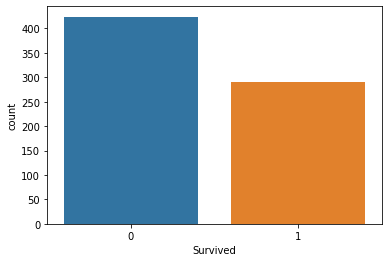

In [136]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

sns.countplot(data=df_2, x="Survived")

plt.show()

# Leyendo el grafico determino que sobrevivieron aproximadamente 290 personas.

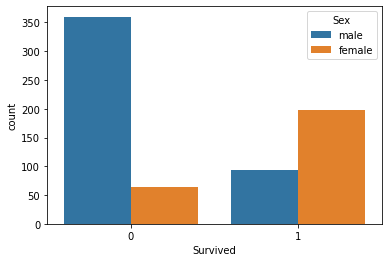

In [137]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=df_2, x="Survived", hue="Sex")

plt.show()

# Sobrevivieron más mujeres lo cuál es lógico si se se hace caso a la famosa 
# frase: "Mujeres y niños primero", al hundirse un barco.

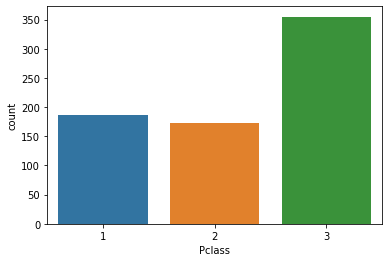

In [138]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

sns.countplot(data=df_2, x="Pclass")

plt.show()

# Habia aproximadamente 350 pasajeros de 3er clase, 170 de 2da y 175 de 3ra.


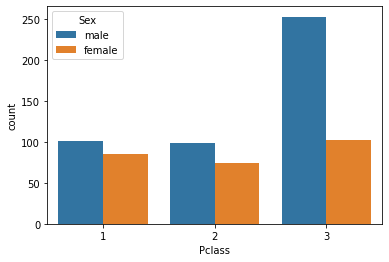

In [139]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=df_2, x="Pclass", hue="Sex")

plt.show()

# Habían aproximadamente la siguiente cantidad de pasajeros.
# Mujeres: 100 pasajeras de 3er clase, 70 de 2da y 75 de 1ra.
# Hombres: 250 pasajeros de 3er clase, 100 de 2da y 100 de 1ra.

#### Transformar variables categóricas texto a clases numeradas

In [140]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [175]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_2.copy()
df_cod.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,0,3,male,22.0,1,0
1,1,1,1,female,38.0,1,0
2,2,1,3,female,26.0,0,0
3,3,1,1,female,35.0,1,0
4,4,0,3,male,35.0,0,0


In [176]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

le_sex = LabelEncoder()
label_encoding = le_sex.fit_transform(df_cod["Sex"])

ohe_sex = OneHotEncoder(sparse=False)
one_hot_encoding = ohe_sex.fit_transform(label_encoding.reshape(-1, 1))

df_ohe = pd.DataFrame(one_hot_encoding, columns=le_sex.classes_, dtype=int)
df_ohe = df_ohe.add_prefix('Sex'+'_')
df_ohe.head()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [177]:
df_cod = df_cod.join(df_ohe)
df_cod = df_cod.drop(["Sex"], axis=1)
df_cod = df_cod.drop(["index"], axis=1)
df_cod

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
709,0,3,39.0,0,5,1,0
710,0,2,27.0,0,0,0,1
711,1,1,19.0,0,0,1,0
712,1,1,26.0,0,0,0,1


In [178]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

clases = le_sex.classes_
print("Las clases que ha detectado el encoder son:",clases[0]+" y "+clases[1])


Las clases que ha detectado el encoder son: female y male


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [179]:
# Alumno, genere un numpy array "X" que posea todos los features (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

x = df_cod.drop("Survived", axis=1).values
y = df_cod["Survived"].values


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [180]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [181]:
# Alumno, entrene un clasificador cualquiera sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

####### El clasificador elegido se armará con RANDOM FOREST. ####### 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=4, max_depth=4, criterion='entropy', random_state=0)
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)
y_hat


array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [182]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)

from sklearn.metrics import accuracy_score
acc = (accuracy_score(y_test, y_hat, normalize=True)) * 100

print("La exactitud del clasificador de Random Forest es",acc,"% y es mayor a 50% del modelo base")

La exactitud del clasificador de Random Forest es 76.27906976744187 % y es mayor a 50% del modelo base


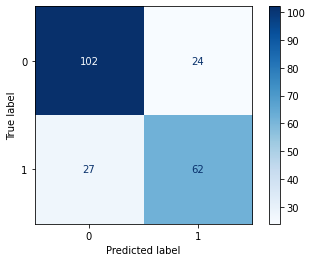

In [183]:
# Alumno, dibujar la matriz de confusio

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)

cmd.plot(cmap=plt.cm.Blues)

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [194]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

df_prueba = pd.DataFrame({"Pclass": [3], "Age": [20], "SibSp": [0],"Parch": [2], "Sex": ["female"]})
df_prueba

# Comentario para el docente: Pruebe el df_prueba con sexo "male" y "female", lo más
# probable es que si es female la persona sobreviva, pero si es male, la misma fallezca. Amazing!!


,Pclass,Age,SibSp,Parch,Sex
0,3,20,0,2,female


In [195]:
# Implementar el Label encoder
le_transform_sex = le_sex.transform(df_prueba["Sex"])

# Implementar el OneHotEncoder
ohe_transform_sex = ohe_sex.transform(le_transform_sex.reshape(-1, 1))

# Armar DataFrame para el OneHotEncoder
df_ohe_sex = pd.DataFrame(ohe_transform_sex, columns=le_sex.classes_, dtype=int).add_prefix('Sex'+'_')

# Unir / Mergear
df_merged = df_prueba.join(df_ohe_sex)


# # Eliminar vieja columna del dataset
df_merged = df_merged.drop(['Sex'], axis=1)
df_merged.head() 



,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,20,0,2,1,0


In [196]:
x_prueba = df_merged.values
y_hat_prueba = clf.predict(x_prueba)
y_hat_prueba[0]

if y_hat_prueba[0] == 1: 
  print("La persona de prueba sobrevivió! Enhorabuena!! \(^^)/")
else:
  print("La persona de prueba ha fallecido.. Mi más sentido pésame :c")

La persona de prueba sobrevivió! Enhorabuena!! \(^^)/
